In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

In [2]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [3]:
data = yf.download('SNOW', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)

In [10]:
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

     Date        Open        High         Low       Close   Adj Close   Volume
246   246  217.110001  220.673004  210.539993  215.600006  215.600006  5552600
247   247  217.500000  218.500000  208.505005  213.679993  213.679993  5153000
248   248  214.009995  219.399994  212.750000  218.229996  218.229996  3921000
249   249  219.300003  226.289993  218.300003  222.899994  222.899994  6119900
250   250  228.300003  235.000000  228.130005  233.279999  233.279999  8258100


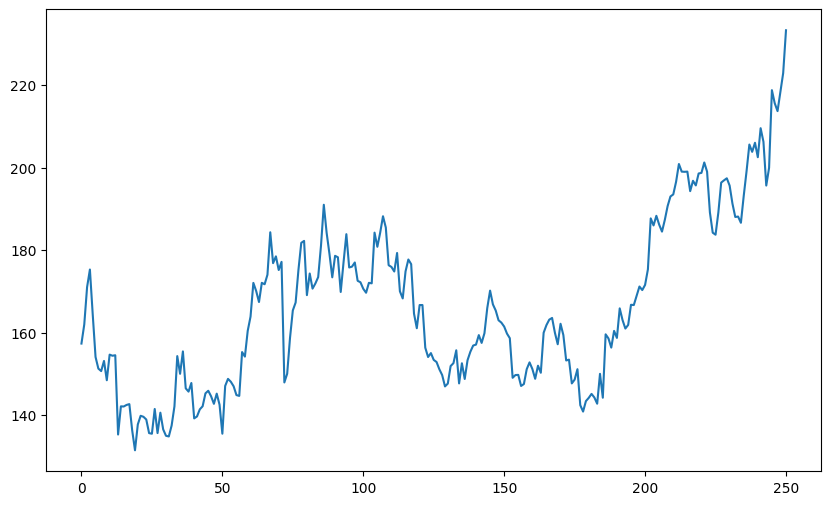

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

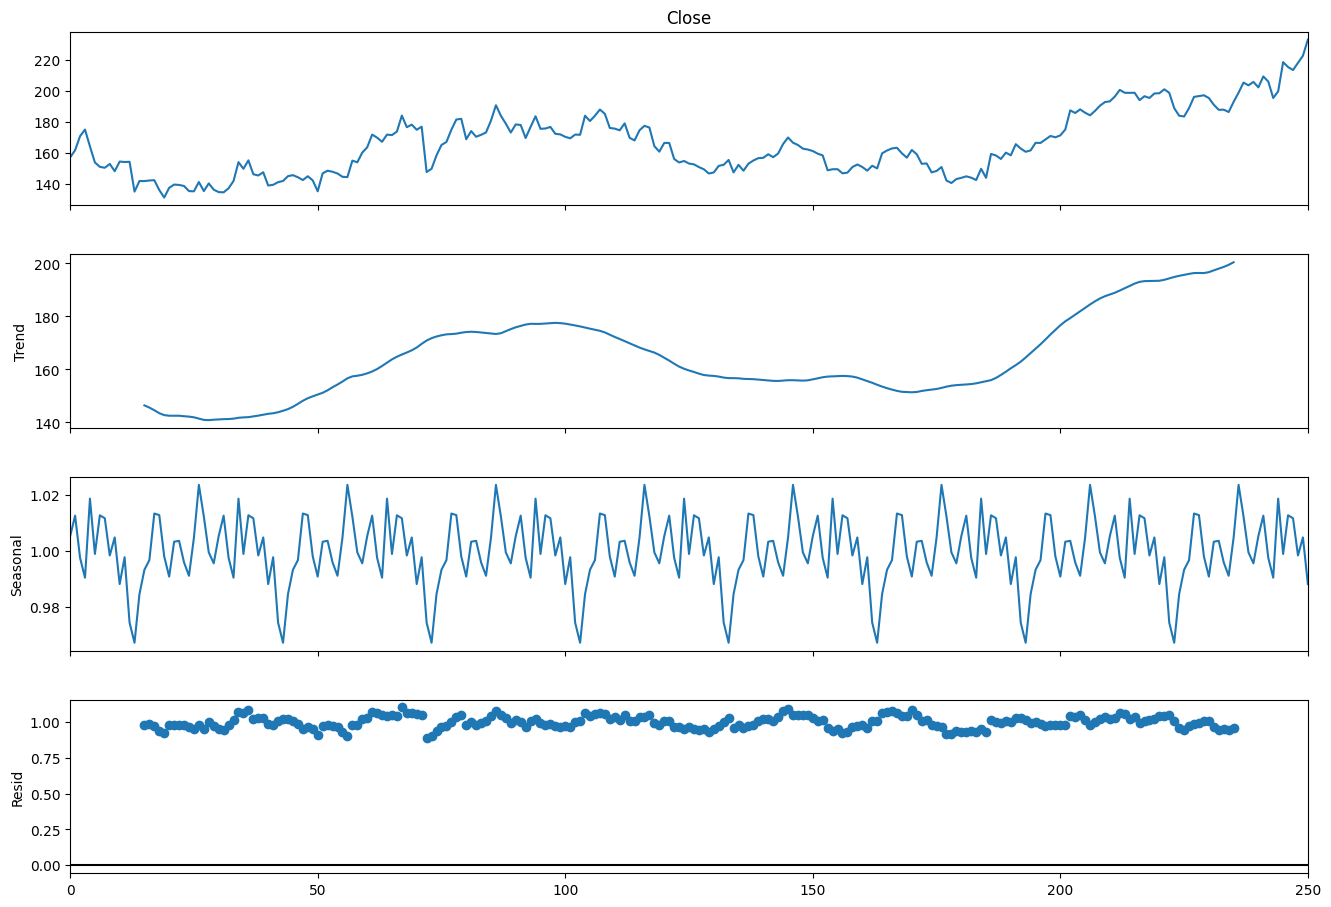

In [13]:
# Plot decomposed time series
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

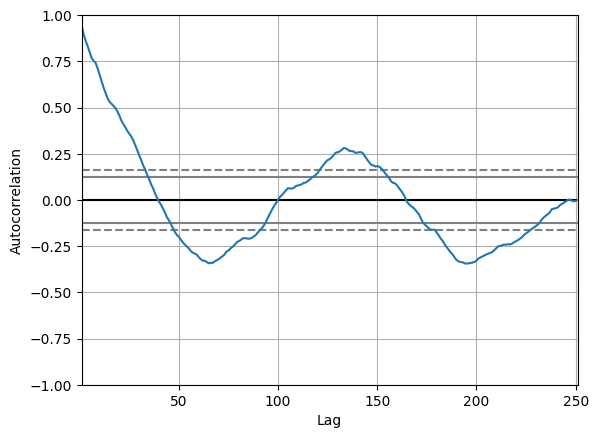

In [14]:
pd.plotting.autocorrelation_plot(data["Close"])

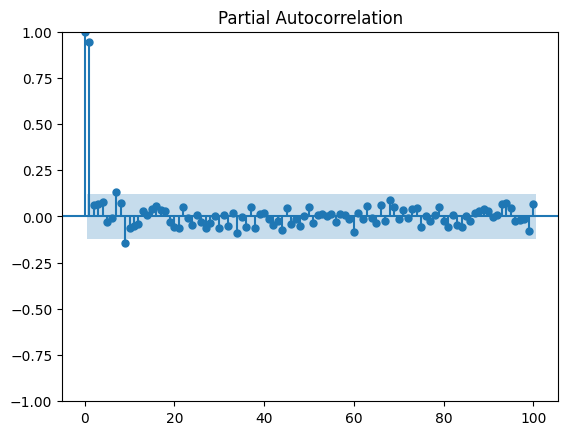

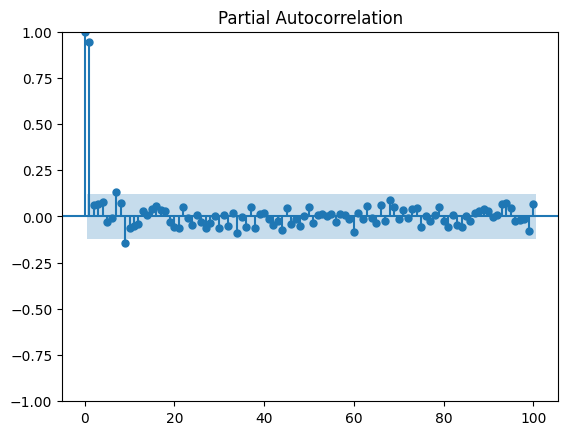

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [16]:
import statsmodels.api as sm
import warnings
# Define the values for p, d, q
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\prati\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -755.113
Date:                            Sat, 10 Feb 2024   AIC                           1540.227
Time:                                    19:49:35   BIC                           1592.311
Sample:                                         0   HQIC                          1561.218
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0152      0.280      0.054      0.957      -0.534       0.564
ar.L2          0.7783      0.255   

In [17]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    234.699191
252    232.269146
253    231.933119
254    232.738494
255    233.747519
256    232.891617
257    232.215719
258    233.601363
259    235.252192
260    236.802668
261    238.585470
Name: predicted_mean, dtype: float64


<Axes: >

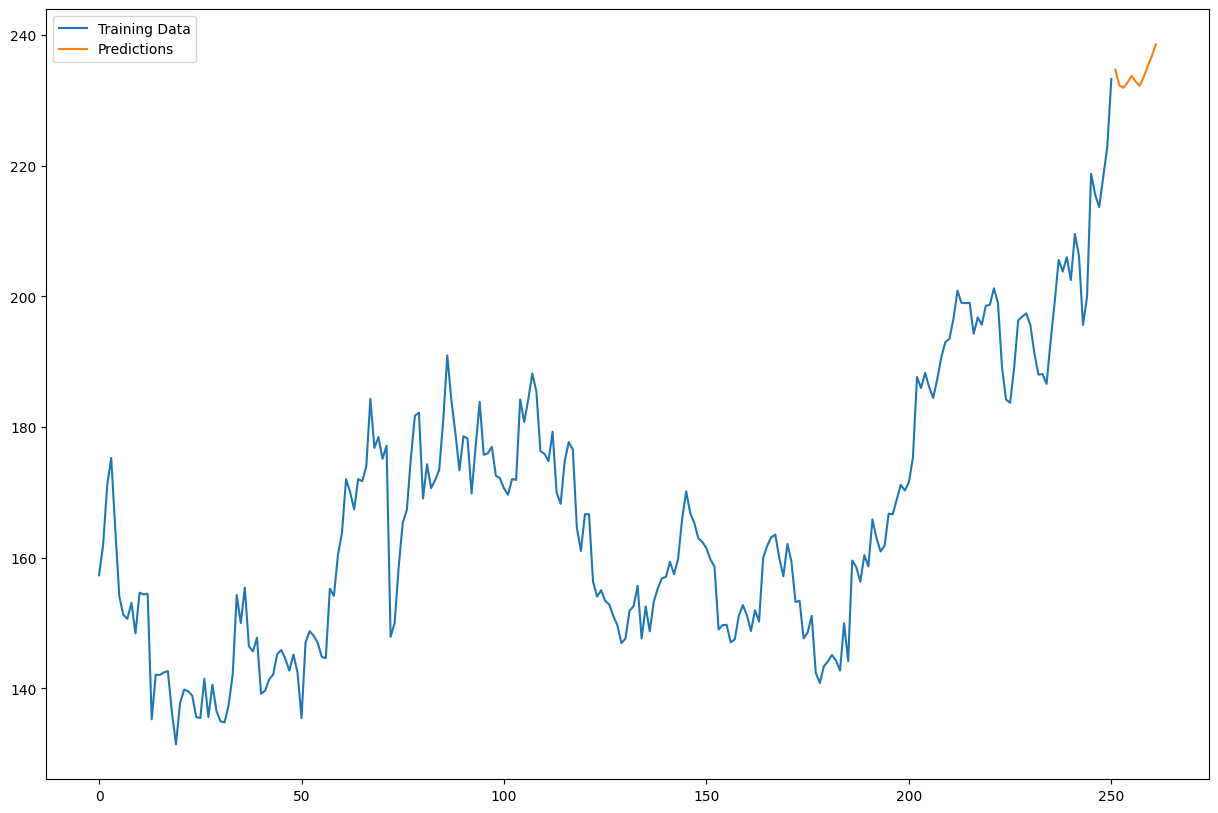

In [19]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")